# Building visual sequences

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.getcwd()
# os.chdir('maximal-sequential-patterns-mining')

'/Users/jinglyng/Documents/MSBA/Capstone (UOB)/maximal-sequential-patterns-mining'

In [3]:
sequences = pd.read_csv('spm_seq_grouped_data_sample.txt', header=None, sep='\t')

In [4]:
# rename columns
sequences.columns = ['sequence']
sequences

,sequence
0,22 -1 37 -2
1,7 -1 7 -1 22 -1 34 -2
2,49 -1 22 -1 46 -1 31 -2
3,37 -1 1 -1 19 -1 18 -1 19 -1 18 -1 19 -1 25 -1...
4,7 -1 7 -1 6 -1 7 -1 10 -1 7 -1 37 -1 7 -1 16 -...
...,...
995,34 -1 52 -1 1 -1 34 -1 31 -1 40 -1 4 -1 31 -1 ...
996,55 -1 22 -1 22 -1 4 -1 4 -1 3 -1 4 -1 22 -1 4 ...
997,4 -1 13 -1 10 -1 28 -1 34 -1 49 -1 28 -1 4 -1 ...
998,48 -1 48 -1 52 -1 27 -1 51 -1 22 -1 21 -1 40 -...


In [5]:
freq_patterns = pd.read_csv('spm_seq_grouped_sample_output.txt', header=None, sep=' -1 #SUP:', engine='python')
freq_patterns.head()

,0,1
0,55,563
1,46,576
2,34,547
3,28,417
4,19,578


In [6]:
freq_patterns

,0,1
0,55,563
1,46,576
2,34,547
3,28,417
4,19,578
5,10,574
6,4,582
7,1,569
8,52 -1 52,432
9,49 -1 49,413


In [7]:
# rename columns
freq_patterns.columns = ['pattern', 'support']

# remove '-1': from support column
freq_patterns['pattern'] = freq_patterns['pattern'].str.replace(' -1 ', ', ')
freq_patterns

,pattern,support
0,55,563
1,46,576
2,34,547
3,28,417
4,19,578
5,10,574
6,4,582
7,1,569
8,"52, 52",432
9,"49, 49",413


In [8]:
# make pattern into a list, pattern_list
pattern_list = freq_patterns['pattern'].tolist()
pattern_list

['55',
 '46',
 '34',
 '28',
 '19',
 '10',
 '4',
 '1',
 '52, 52',
 '49, 49',
 '43, 43',
 '40, 40',
 '37, 37',
 '31, 31',
 '25, 25',
 '22, 22',
 '16, 16',
 '13, 13',
 '7, 7']

In [9]:
# Function to clean up sequence
def clean_sequence(seq):
    # Split the sequence into a list of integers, ignoring -1 and -2
    return [int(x) for x in seq.split() if x not in ['-1', '-2']]

# Apply the function to the sequence column
sequences['sequence'] = sequences['sequence'].apply(clean_sequence)

sequences

,sequence
0,"[22, 37]"
1,"[7, 7, 22, 34]"
2,"[49, 22, 46, 31]"
3,"[37, 1, 19, 18, 19, 18, 19, 25, 19, 10, 19, 40..."
4,"[7, 7, 6, 7, 10, 7, 37, 7, 16, 31, 52, 16, 49,..."
...,...
995,"[34, 52, 1, 34, 31, 40, 4, 31, 31, 52, 49, 55,..."
996,"[55, 22, 22, 4, 4, 3, 4, 22, 4, 40, 22, 4, 4, ..."
997,"[4, 13, 10, 28, 34, 49, 28, 4, 10, 46, 46, 40,..."
998,"[48, 48, 52, 27, 51, 22, 21, 40, 7, 33, 50, 50..."


In [10]:
sequences['sequence'] = sequences['sequence'].apply(lambda x: [int(item) for item in x])
sequences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [12]:

# Function to check if a pattern exists in a sequence
def check_pattern_in_sequence(sequence, pattern):
    pattern = list(map(int, pattern.split(', ')))
    pattern_length = len(pattern)
    for i in range(len(sequence) - pattern_length + 1):
        if sequence[i:i + pattern_length] == pattern:
            return 1
    return 0

In [13]:
combined_seq = sequences.copy()

# Create dummy columns for each pattern
for pattern in pattern_list:
    col_name = f'pattern_{pattern.replace(", ", "_")}'
    combined_seq[col_name] = combined_seq['sequence'].apply(lambda seq: check_pattern_in_sequence(seq, pattern))


In [14]:

combined_seq.head()


,sequence,pattern_55,pattern_46,pattern_34,pattern_28,pattern_19,pattern_10,pattern_4,pattern_1,pattern_52_52,pattern_49_49,pattern_43_43,pattern_40_40,pattern_37_37,pattern_31_31,pattern_25_25,pattern_22_22,pattern_16_16,pattern_13_13,pattern_7_7
0,"[22, 37]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"[7, 7, 22, 34]",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,"[49, 22, 46, 31]",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"[37, 1, 19, 18, 19, 18, 19, 25, 19, 10, 19, 40...",0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,"[7, 7, 6, 7, 10, 7, 37, 7, 16, 31, 52, 16, 49,...",0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1


In [15]:
# Filter sequences containing pattern_52_52
filtered_sequences = combined_seq[combined_seq['pattern_52_52'] == 1].copy()

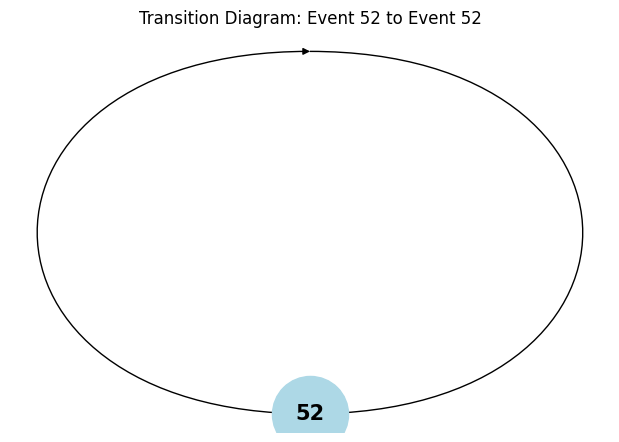

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
G.add_node(52)
G.add_edge(52, 52)

# Draw the graph
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=15, font_weight='bold')
plt.title('Transition Diagram: Event 52 to Event 52')
plt.show()

In [17]:
# import ipywidgets as widgets
# from IPython.display import display

# # Create a button widget
# button = widgets.Button(description="Show Sequences with Pattern 52 -> 52")

# # Define the callback function
# def on_button_click(b):
#     display(filtered_sequences['sequence'])

# # Bind the callback function to the button
# button.on_click(on_button_click)

# # Display the button
# display(button)

In [18]:
import ipywidgets as widgets
from IPython.display import display

# Create a button widget
button = widgets.Button(description="Show Sequences with Pattern 52 -> 52")

# Initialize a flag for the display state
display_state = {'is_displayed': False}

# Define the callback function
def on_button_click(b):
    with output:
        if display_state['is_displayed']:
            clear_output()
            display_state['is_displayed'] = False
            button.description = "Show Sequences with Pattern 52 -> 52"
        else:
            display(filtered_sequences['sequence'])
            display_state['is_displayed'] = True
            button.description = "Hide Sequences with Pattern 52 -> 52"

# Bind the callback function to the button
button.on_click(on_button_click)

# Display the button and create an output area
output = widgets.Output()
display(button, output)

Button(description='Show Sequences with Pattern 52 -> 52', style=ButtonStyle())

Output()

In [22]:
# unlist each row of filtered_sequences['sequences'] and add a new column 'session_id', which is the index of the original sequence row
filtered_sequences = filtered_sequences.reset_index(drop=True)
filtered_sequences['session_id'] = filtered_sequences.index
filtered_sequences = filtered_sequences.explode('sequence')
filtered_sequences

,sequence,pattern_55,pattern_46,pattern_34,pattern_28,pattern_19,pattern_10,pattern_4,pattern_1,pattern_52_52,...,pattern_43_43,pattern_40_40,pattern_37_37,pattern_31_31,pattern_25_25,pattern_22_22,pattern_16_16,pattern_13_13,pattern_7_7,session_id
0,52,1,1,1,0,1,1,0,1,1,...,1,0,0,0,0,0,0,1,0,0
0,52,1,1,1,0,1,1,0,1,1,...,1,0,0,0,0,0,0,1,0,0
0,42,1,1,1,0,1,1,0,1,1,...,1,0,0,0,0,0,0,1,0,0
0,43,1,1,1,0,1,1,0,1,1,...,1,0,0,0,0,0,0,1,0,0
0,43,1,1,1,0,1,1,0,1,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,28,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,227
227,27,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,227
227,41,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,227
227,29,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,227


In [23]:
filtered_sequences.to_csv('sample_freq_sequences_52_52.csv', index=False)